# Lab 5

**This lab must be completed individually.**

Where provided, try your best to match the **Sample Output** as best as you can.

In [1]:
# Before moving forward, let's import these libaries first.
import pandas as pd
import numpy as np
import io
import requests

## A. Plotting using Seaborn (and matplotlib) (Total: 2 marks)

`matplotlib` is a Python library for data visualization. 
`seaborn` is a statistical data visualization library layer that provides a high-level interface for drawing statistical graphics and some convenient functions for plotting data frames.

You may need to install `seaborn` and `matplotlib`

`conda install seaborn`<br>
`conda install matplotlib`

and just in case it's not the latest version, go ahead and update it:

`conda update matplotlib`<br>
`conda update seaborn`



### A1: Set the Seaborn figure theme and scale up the text in the figures (2 marks)

There are five preset Seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. 
They are each suited to different applications and personal preferences.
You can see what they look like [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

Hint: You will need to use the `font_scale` property of the `set_theme()` function in Seaborn.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme( style = "darkgrid" , font_scale = 1.1)

## B: Exploratory Data Analysis (34 marks)

For following part of the lab, we're going to use a dataset from [Kaggle.](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957)

### B1. Describe the dataset (2 marks) 

Consider the following questions to guide you in your exploration:

- Who: Kaggle user "Agirlcoding" who Consultant at Deloitte.
- What: Details of all the space fights since 1957
- When: August, 20200
- Why: I don't think there was a particalar reason in mind, But it could be used to find realiabilty by a certain company, or to mesure space junk.

- How: Webscraping from https://nextspaceflight.com/launches/past/?page=1. (Particular method not inculded)


#your solution here

*Hint: You probably will not need more than 250 words to describe your dataset. All the questions above do not need to be answered, it's more to guide your exploration and think a little bit about the context of your data. It is also possible you will not know the answers to some of the questions above, that is FINE - data scientists are often faced with the challenge of analyzing data from unknown sources. Do your best, acknowledge the limitations of your data as well as your understanding of it. Also, make it clear what you're speculating about. For example, "I speculate that the {...column_name...} column must be related to {....} because {....}."*

### B2. Load data (1 mark)

Without downloading the csv file to your repo, load the "*Space_Cleaned.csv*" file using the direct URL from [this link](https://gist.githubusercontent.com/lintonylin/4f9ba13dc37b7510ea392d95c494f891/raw/1092dba2c54ed10d03f2999d8ad7878757b39a8f/Space_Cleaned.csv)

**DO NOT DOWNLOAD THE DATA TO YOUR REPOSITORY! ** 
Open the link, copy it and pass it to `read_csv()`.

Use `pandas` module/package and the `read_csv()` function to load the data by passing in the URL and then save the data in a variable called `df`.

In [19]:
url="https://gist.githubusercontent.com/lintonylin/4f9ba13dc37b7510ea392d95c494f891/raw/1092dba2c54ed10d03f2999d8ad7878757b39a8f/Space_Cleaned.csv"
df =pd.read_csv(url)

df.head()

,id,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Year
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,United States of America,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Kazakhstan,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,United States of America,2020


### B3. Explore your dataset (3 marks)

Which of your columns are interesting/relevant? Remember to take some notes on your observations, you'll need them for the next EDA step (initial thoughts).

#### B3.1:  You should start with [`df.describe().T`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) (2 marks)

See [linked documentation]((https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for the use of `include`/`exclude` to look at numerical and categorical data.

In [24]:
df.describe( include=['O'])

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
count,4284,4284,4284,4284,4284,963,4284,4284
unique,53,132,4279,4238,2,55,4,16
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450,Success,Russian Federation
freq,1777,235,2,6,3531,136,3844,1395


#### B3.2 Let's try `pandas_profiling` now. (1 mark)

**Hint: To install the [`pandas_profiling`](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3) package, you'll need to use `conda`:**

- `conda install -c conda-forge pandas-profiling`

In [25]:
from pandas_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### B4. Initial Thoughts (2 marks)

#### B4.1. Use this section to record your observations. (2 marks)

This data is very intresting. Despite the fact that there is a not a lot of collums, I think theres alot we can learn from here. I in particular am intested by the amout of rockets launched during the space race and who lanches the most rockets today ( Besides the usa). Furthermore an exportation of space x will also be worth exploring

#### # Your observations here:

- 4278 Distinct Rocket Launches 
- 3879 Success with 339 Failers gives us a Fail percentage of 8%
- 790 Rockets are active right now.
- A total of 53 companys have launched rockets

### B5. Wrangling (10 marks)

The next step is to wrangle your data based on your initial explorations. Normally, by this point, you have some idea of what your research question will be, and that will help you narrow and focus your dataset. 

In this lab, we will guide you through some wrangling tasks with this dataset.

#### B5.1 Change name of the column Rocket to Mission Cost and save it. (The name of the column rocket has one space before it (use ' Rocket'))(1 mark)

In [6]:
df = df.rename( columns = {"Rocket" : "Mission Cost"})

#### B5.2 Drop any NULL values if there is any. (Keep in mind whether you decide to save the dataset with no null or not will effect your future plots) (1 mark)

In [7]:
df = df.dropna(axis = 0)

#### B5.3 Reset the index to get a new index without missing values (1 mark)

In [8]:
df = df.reset_index()

#### B5.4. A new column was added called `index`; remove it. (1 mark)

In [9]:
df = df.drop("index" , axis = 1)

#### B5.5 Sort the dataframe by column Company Name. (1 mark)

In [10]:
df = df.sort_values("Company Name")

#### B5.6 Add a new column to the dataframe to convert the "Datum" column to a datetime object (2 marks)


To do this, first we need to add a new column to our dataset to turn the column "Datum" into a proper datetime object so we can do operations on it.

*Hint: Use to [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function to help you first convert it into a datetime object, and then remove the timezone information and HH:MM:SS using [`.dt.date`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html).*

In [11]:
try:
    df.insert(loc= 7, column = "Date" , value = pd.to_datetime( df["Datum"] , utc = True).dt.date )

except:
    print("Column alread inserted")
    



#### B5.7. Find the earliest and the latest reported launch in the dataset. (3 mark)

You should use the pandas .min() and .max() functions here, now that your date string is converted to a DateTime object.

##### Sample Output

> The first launch in the dataset happended : 1957-10-04.<br>
> The last launch in the dataset happended : 2020-08-07.<br>

In [12]:
print("The first lanch in the data set on : " ,  min(df["Date"]) )
print("The latest launch in the data set on:" ,   max(df["Date"]) )

The first lanch in the data set on :  1964-09-01
The latest launch in the data set on: 2020-08-07


### B6. Research questions (2 marks)

#### B6.1 Come up with at least two research questions about the dataset that will require data visualizations to help answer. (2 marks)

Recall that for this purpose, you should only aim for "Descriptive" or "Exploratory" research questions.

**Hint: You are welcome to calculate any columns that you think might be useful to answer the question (or re-add dropped columns.***


#### # Your solution here: 



**1. RQ 1: Which companys are launch the most missions?.**

**2. Which company has the most failed missions 2:**



### B7. Data Analysis and Visualizations (10 marks)

#### B7.1. Counts of mission status (2 marks)
Using [`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot), plot the number of space launches by their status. 

Set the title to be "Status Mission of space launches". 

*Hint: The documentation above contains some examples that might help you get started*
#### Sample output
<img src="./images/bar1.png" width="400px" />

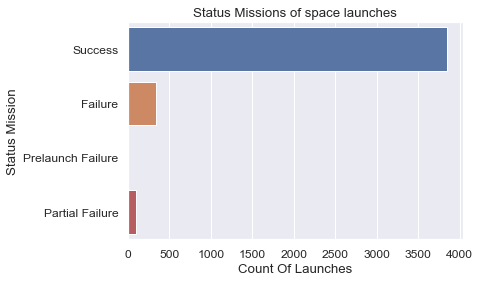

In [26]:
ax = sns.countplot( y = df["Status Mission"] ).set(xlabel='Count Of Launches', title = 'Status Missions of space launches')

#### B7.2. Counts of launches by country (2 marks)

Plot the counts of launches by country, and order the y-axis by increasing the number of launches (use the `order` parameter of the `countplot()` function).

<img src="./images/bar2.png" width="700px">

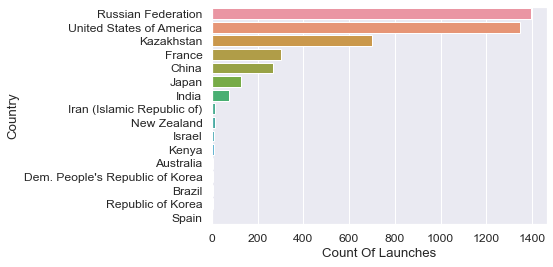

In [27]:
ax = sns.countplot( y = df["Country"] , order = df['Country'].value_counts().index ).set(xlabel='Count Of Launches')

#### B7.3 Status of mission for the top 5 companies (3 marks)

Plot the counts of launches by mission status and country, and order the y-axis by increasing the number of launches 

*Hint: More information and examples can be find in [link](https://www.geeksforgeeks.org/matplotlib-axes-axes-barh-in-python/)*

*Hint: Your plot doesn't have to look exactly like this, but please do explore the [possible color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html). You can specify the colour palette by passing in the keyword like this: `palette='colorblind'`.*

#### Sample output
<img src="./images/bar3.png" width="600px" />

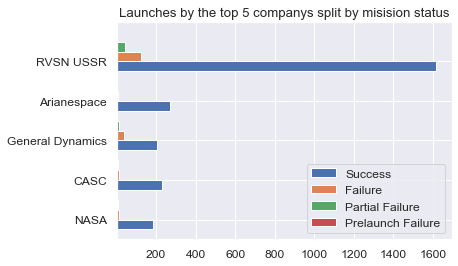

In [28]:
names = list(df['Company Name'].value_counts().index[0: 5])

names.reverse()

data = list()

for i in names:
    data.append( [len(df[ (df["Company Name"] == i) & (df["Status Mission"] == "Success" )]),
                  len(df[ (df["Company Name"] == i) & (df["Status Mission"] == "Failure" )]), 
                  len(df[ (df["Company Name"] == i) & (df["Status Mission"] == "Partial Failure" )]),
                  len(df[ (df["Company Name"] == i) & (df["Status Mission"] == "Prelaunch Failure" )]) ])
  



dim = len(data[0]) 
w = 1
dimw = w / dim 
  
fig, ax = plt.subplots() 
x = np.arange(len(data))
  
for i in range( len(data[0]) ): 
    y = [d[i] for d in data] 
    b = ax.barh(x + i * dimw, y, 
                dimw, left = 0.001) 
  
ax.set_yticks(x + dimw / 2) 
ax.set_yticklabels( names) 

ax.legend(['Success', "Failure", "Partial Failure", "Prelaunch Failure"])
ax.set_title('Launches by the top 5 companys split by misision status') 

    
plt.show() 

#### B7.4. Plot the launche counts plotted over time by mission status (3 mark)

Using `sns.displot`, plot the histogram of launches over time.

*Hint 1: [Here is a nice tutorial](https://seaborn.pydata.org/tutorial/distributions.html) of all the different options that are possible when creating a histogram.*

#### Sample output
<img src="./images/bar4.png" width="800px">

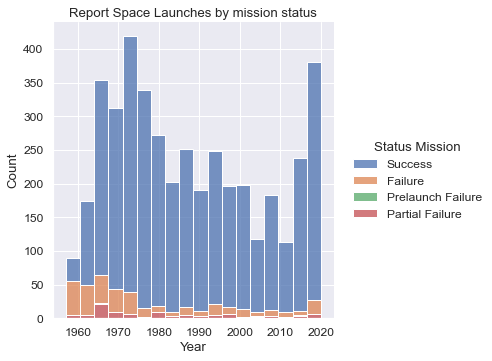

In [30]:
ax = sns.displot( df, x = "Year", hue="Status Mission", multiple="stack" )
ax.set(title='Report Space Launches By Mission Status')


#### B7.5. BONUS - For a bonus mark, move the legend to the top left of the plot (1 mark)

#### B7.6. BONUS - For a bonus mark, plot a similar graph like D7 that compares top 5 counties in terms of number of launches(1 mark)



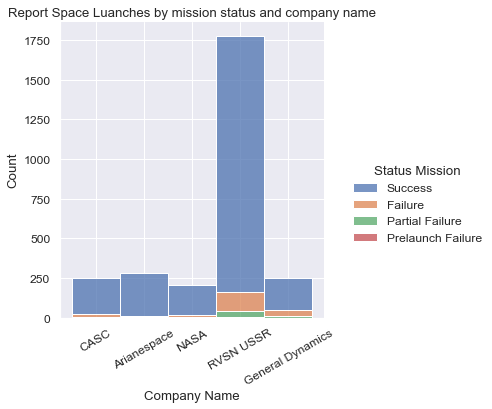

In [40]:



ax = sns.displot(df[df['Company Name'].isin(df['Company Name'].value_counts().index[0: 5])] , x = "Company Name", hue="Status Mission", multiple="stack" )
ax.set(title='Report Space Luanches by mission status and company name')
ax.set_xticklabels(rotation=30)

### B8. Summary and conclusions (4 marks)

#### B8.1. Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations. (3 marks)

- **Research Question 1:** RQ here

    - To my surprise China, France and India over taken Russia for most missions, however fracnce is still on top.
    -  Furthermore i leared that newzeland and kenya have a space program.
    

- **Research Question 2:** RQ here

    - It looks like out of the top 5, China Areospace Science and Technology corpration has the most Failers over all, out of the top 5 companys.
    - However Space x has the most failers excluding partial out of the top 5..

## C. Method Chaining (6 marks)

Method chaining allows you to apply multiple processing steps to your dataframe in a fewer lines of code so it is more readable. You should avoid having too many methods in your chain, as the more you have in a single chain, the harder it is to debug or troubleshoot. I would target about 5 methods in a chain, though this is a flexible suggestion and you should do what makes your analysis the most readable and group your chains based on their purpose (e.g., loading/cleaning, processing, etc…).

#### C1. Use Method Chaining on the commands from sections B5.1, B5.2, B5.3, B5.4, B5.5, B5.6 (6 marks)

In [18]:
url="https://gist.githubusercontent.com/lintonylin/4f9ba13dc37b7510ea392d95c494f891/raw/1092dba2c54ed10d03f2999d8ad7878757b39a8f/Space_Cleaned.csv"
df = pd.read_csv(url).rename( columns = {"Rocket" : "Mission Cost"}).dropna(axis = 0).reset_index().drop("index" , axis = 1).sort_values("Company Name")

#Insert dosnt want to chain.
df.insert(loc= 7, column = "Date" , value = pd.to_datetime( df["Datum"] , utc = True).dt.date )
df

,id,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Date,Status Mission,Country,Year
154,212,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Sep 25, 2018 22:38 UTC",Ariane 5 ECA | Horizons-3e & Azerspace 2/Intel...,StatusActive,200,2018-09-25,Success,France,2018
150,205,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Sat Oct 20, 2018 01:45 UTC",Ariane 5 ECA | BepiColombo,StatusActive,200,2018-10-20,Success,France,2018
351,485,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Sep 30, 2015 20:30 UTC","Ariane 5 ECA | NBN Co 1A, ARSAT-2",StatusActive,200,2015-09-30,Success,France,2015
159,221,Arianespace,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Wed Aug 22, 2018 21:20 UTC",Vega | ADM-Aeolus,StatusActive,37,2018-08-22,Success,France,2018
598,841,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Nov 14, 2007 22:03 UTC",Ariane 5 ECA | Skynet 5B & Star One C1,StatusActive,200,2007-11-14,Success,France,2007
...,...,...,...,...,...,...,...,...,...,...,...
672,979,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Nov 08, 2004 18:29 UTC",Soyuz 2.1a | Demo Flight,StatusActive,48.5,2004-11-08,Success,Russian Federation,2004
316,435,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Sat Jun 04, 2016 14:00 UTC",Rokot/Briz KM | Cosmos 2517,StatusRetired,41.8,2016-06-04,Success,Russian Federation,2016
144,198,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Sat Nov 03, 2018 20:17 UTC",Soyuz 2.1b/Fregat | GLONASS-M No.54S,StatusActive,48.5,2018-11-03,Success,Russian Federation,2018
657,948,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Aug 26, 2005 18:34 UTC",Rokot/Briz KM | Monitor-E,StatusRetired,41.8,2005-08-26,Success,Russian Federation,2005
